

---



# Sugarcane Leaf Disease Detection
The model is capable of performing Image Classification for:
1.   Healthy
2.   Red Rot
1.   Red Rust

**Dataset:**<br>
*Healthy leaves: 75 Images*<br>
*Red Rot leaves: 74 Images*<br>
*Red Rust leaves: 75 Images*<br>
*Total Images: 224 Images*


---






In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### Importing Libraries

In [ ]:
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#Sharpening of images
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

#Preprocessing of Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Buliding Model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#Accuracy
from sklearn.metrics import classification_report

In [ ]:
data_dir = '/content/drive/MyDrive/Sugarcane_Leaves_Dataset'
categories = os.listdir(data_dir)

In [ ]:
categories=sorted(categories)
print(categories)

['RedRot', 'healthy', 'olddata']


In [ ]:
labels=[i for i in range(len(categories))]
labels

[0, 1, 2]

#### Making a dictionary with Classes as Keys and Indices as Values

In [ ]:
label_dict=dict(zip(categories, labels))
label_dict

{'RedRot': 0, 'healthy': 1, 'olddata': 2}

In [ ]:
data_list=[] #data_list- storing the images
labels_list=[] #label_list - storing the class labels

In [ ]:
data1="/content/drive/MyDrive/Sugarcane_Leaves_Dataset/olddata/healthy 2"
data2="/content/drive/MyDrive/Sugarcane_Leaves_Dataset/olddata/RedRot 2"
data3="/content/drive/MyDrive/Sugarcane_Leaves_Dataset/olddata/RedRust 2"
count_healthy=0
count_redrot=0
count_redrust=0

In [ ]:
for i in os.listdir(data1):
        img_path=os.path.join(data1, i)
        count_healthy=count_healthy+1

In [ ]:
for i in os.listdir(data2):
        img_path=os.path.join(data2, i)
        count_redrot=count_redrot+1

In [ ]:
for i in os.listdir(data3):
        img_path=os.path.join(data3, i)
        count_redrust=count_redrust+1

In [ ]:
count_healthy,count_redrot,count_redrust

(556, 610, 455)

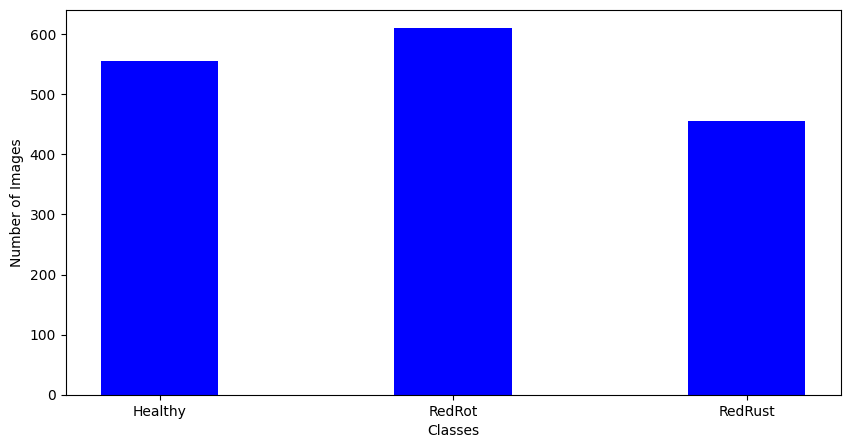

In [ ]:
fig = plt.figure(figsize = (10, 5))
classes=["Healthy","RedRot", "RedRust"]
values=[count_healthy,count_redrot,count_redrust]
#creating the bar plot
plt.bar(classes, values, color ='blue',
        width = 0.4)

plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

#### Defining a Sharpen Filter

In [ ]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

<ipython-input-114-ef032f6959a9>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(og_image);


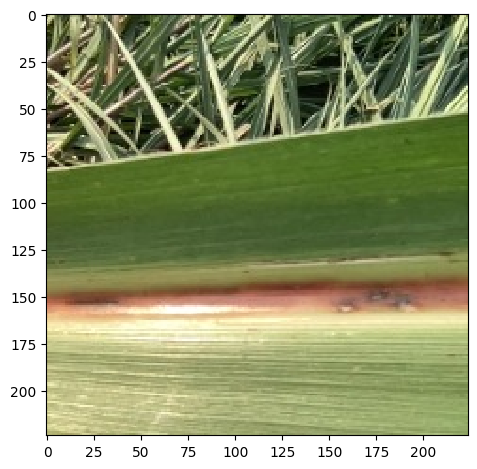

In [ ]:
og_image = imread(data_dir+'/RedRot/0.jpg')
imshow(og_image);

In [ ]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [ ]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel,
                                     iterations)
    final_image = yuv2rgb(img_yuv)
    return final_image

<ipython-input-117-6519f6b1fd5b>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(final_image);


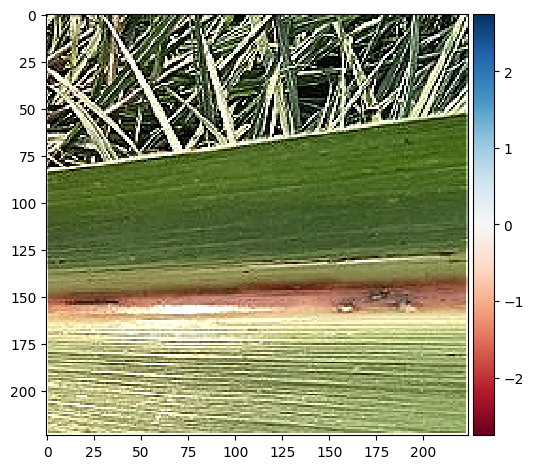

In [ ]:
final_image = convolver_rgb(og_image, sharpen, iterations = 1)
imshow(final_image);

#### Image Preprocessing
1.   Resizing to 224,224
2.   Sharpening



In [ ]:
from PIL import Image
for i in categories:
    folder_path = os.path.join(data_dir, i)  # path to each disease folder
    img_names = os.listdir(folder_path)  # all items (files and subdirectories) in each disease folder
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        # Check if the current item is a file before opening
        if os.path.isfile(img_path):
            # Exclude specific files if needed
            if img_path in ['/content/drive/MyDrive/Sugarcane_Leaves_Dataset/olddata/RedRot 2/100.jpg',
                            '/content/drive/MyDrive/Sugarcane_Leaves_Dataset/olddata/RedRust 2/10.jpg',
                            '/content/drive/MyDrive/Sugarcane_Leaves_Dataset/olddata/healthy 2/100.jpg']:
                continue  # Skip these specific files
            # Process the image
            try:  # Handle potential errors during image processing
                img = Image.open(img_path)
                img = img.resize((224, 224))
                img = np.array(img)
                img = convolver_rgb(img, sharpen, iterations=1)
                data_list.append(img)
                labels_list.append(label_dict[i])
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

In [ ]:
data_list[0].shape

(224, 224, 3)

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Convert labels_list to a NumPy array first (if it's a list)
labels_list = np.array(labels_list)

# Check if labels_list is already one-hot encoded
if labels_list.ndim == 2 and labels_list.shape[1] > 1:
    labels_list = np.argmax(labels_list, axis=1)  # Convert one-hot to class labels

# Apply LabelEncoder
lb = LabelEncoder()
labels_list = lb.fit_transform(labels_list)  # Encode categorical labels

# Convert back to one-hot encoding
labels_list = to_categorical(labels_list)

print(labels_list.shape)  # Check the final shape


(148, 2)


In [ ]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(148, 224, 224, 3)


#### Visualizing Images in the Dataset after Preprocessing

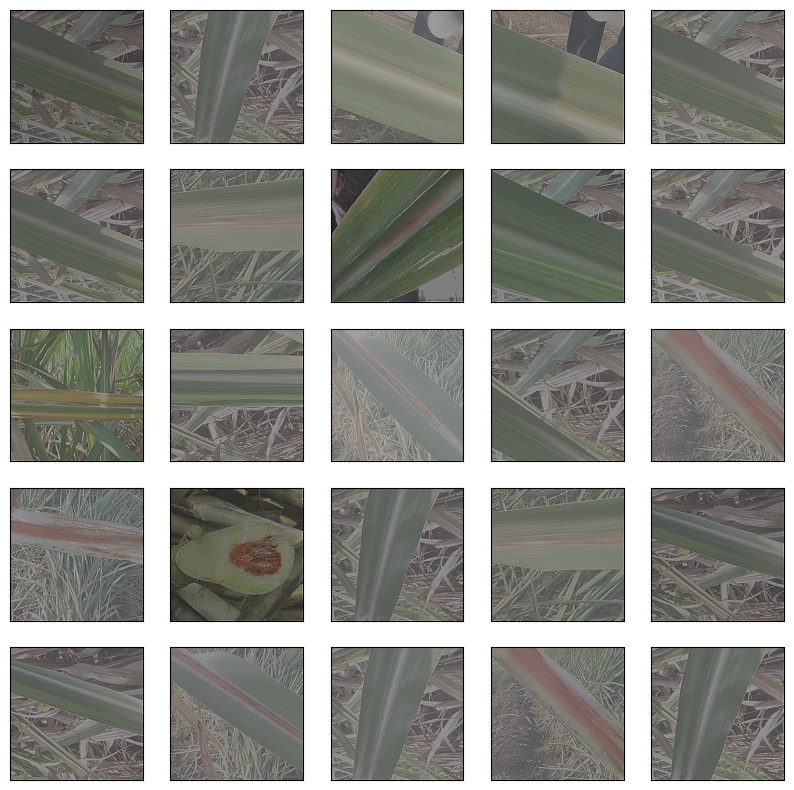

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

num_samples = len(data)  # Get the actual number of samples in data

for i in range(min(25, num_samples)):  # Ensure we don't exceed dataset size
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Pick a valid random index
    random_index = np.random.randint(num_samples)

    # Normalize image values if necessary (only if they are outside [0,1] or [0,255])
    img = data[random_index]
    if img.min() < 0 or img.max() > 1:  # Normalize to [0,1]
        img = (img - img.min()) / (img.max() - img.min())

    plt.imshow(img, cmap=plt.cm.binary)

plt.show()


#### Image Augmentation

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

#### Splitting Dataset into Train and Test Sets

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
print( trainX.shape, testX.shape, trainY.shape, testY.shape)

(118, 224, 224, 3) (30, 224, 224, 3) (118, 2) (30, 2)


#### The model

In [ ]:
from keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Dropout
from keras.layers import Input

In [ ]:
base_model = DenseNet201(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet',
                         pooling="avg"
                     )

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
base_model.trainable = False
image_input = Input(shape=(224, 224, 3))

x = base_model(image_input,training = False)

x = Dense(256,activation = "relu")(x)
x = Dropout(0.2)(x)

x = Dense(128,activation = "relu")(x)
x = Dropout(0.2)(x)

image_output = Dense(3,kernel_regularizer=l2(0.01),activation="softmax")(x) #output layer
#kernel Regulariser- SVM

model = Model(image_input,image_output)
model.compile(optimizer="adam",loss="squared_hinge",metrics=["accuracy"])
#loss function is square hinged- SVM

In [ ]:
!apt-get install graphviz -y
!pip install --upgrade graphviz pydot pydotplus


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(base_model, to_file="/content/Densenet.png", show_shapes=True, show_layer_names=True, rankdir="LR")


#### Training the Model

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Get the previous last layer's output
x = model.layers[-2].output  # Second last layer (adjust if needed)

# Define a new output layer
new_output = Dense(1, activation="sigmoid")(x)  # Single neuron for binary classification

# Create a new model with the modified output
model = Model(inputs=model.input, outputs=new_output)

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# STEP 1: Convert one-hot encoded labels to single class (0 or 1)
trainY = np.argmax(trainY, axis=1)
testY = np.argmax(testY, axis=1)

# STEP 2: Modify the model output layer
x = model.layers[-2].output  # You may adjust if needed
new_output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=new_output)

# STEP 3: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# STEP 4: Train the model
BS = 32
EPOCHS = 10

history = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 17s/step - accuracy: 0.6515 - loss: 0.6380 - val_accuracy: 0.7333 - val_loss: 0.4713
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.8438 - loss: 0.4107

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.8438 - loss: 0.4107 - val_accuracy: 0.7667 - val_loss: 0.4514
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 17s/step - accuracy: 0.8599 - loss: 0.3499 - val_accuracy: 0.9333 - val_loss: 0.1868
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 5s/step - accuracy: 0.9062 - loss: 0.2909 - val_accuracy: 0.9333 - val_loss: 0.1569
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 12s/step - accuracy: 0.9650 - loss: 0.1630 - val_accuracy: 0.9000 - val_loss: 0.1602
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.9375 - loss: 0.1539 - val_accuracy: 0.9333 - val_loss: 0.1327
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - accuracy: 0.9474 - loss: 0.1116 - val_accuracy: 0.9667 - val_loss: 0.0902
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.9375 - loss: 0.1047 - val_accuracy: 0.9667 - val_loss: 0.0548
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 69s 12s/step - accuracy: 0.9942 - loss: 0.0543 - val_accuracy: 0.9667 - val_loss: 0.0351
Epoch 10/10
3/3

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

print("[INFO] evaluating network...")

# Predict class probabilities
predIdxs = model.predict(testX, batch_size=BS)

# Convert predicted probabilities to class labels
predIdxs = np.argmax(predIdxs, axis=1)

# Show classification report (Remove testY.argmax(axis=1))
print(classification_report(testY, predIdxs))  # <-- Fix applied here!


[INFO] evaluating network...
1/1 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Unique classes in testY: [0 1]
Unique classes in predictions: [0]


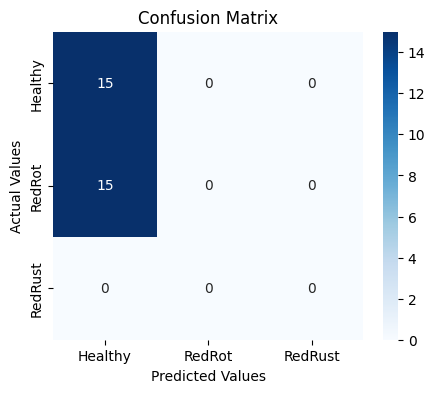

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Check which classes are present
print("Unique classes in testY:", np.unique(testY))
print("Unique classes in predictions:", np.unique(predIdxs))

# Define class labels (Fixed)
class_labels = ['Healthy', 'RedRot', 'RedRust']

# Compute confusion matrix (Force all classes)
cm = confusion_matrix(testY, predIdxs, labels=[0, 1, 2])

# Convert confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues, fmt='d')

plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.show()


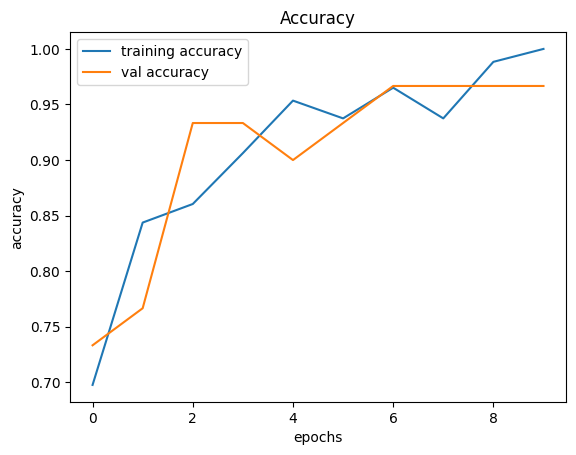

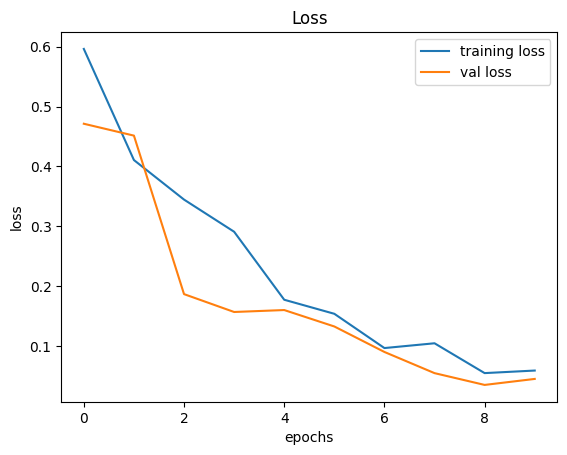

In [ ]:
import matplotlib.pyplot as plt
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Making the Predictions

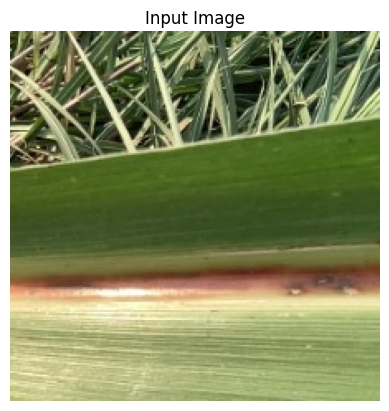

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
 Probability of disease: 0.0019
❌ Disease detected


In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.densenet import preprocess_input  # Or use the right one for your model

#  Load & preprocess image
img_path = "/content/drive/MyDrive/Sugarcane_Leaves_Dataset/olddata/RedRot 2/10.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # Add batch dimension
x = preprocess_input(x)  # Use appropriate preprocessing

#  Display image
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

#  Predict
predi = model.predict(x)
prob = predi[0][0]  # Get scalar prediction

#  Show probability
print(f" Probability of disease: {prob:.4f}")

#  Decide class based on threshold
if prob <= 0.5:
    print("❌ Disease detected")
else:
    print("✅ It is a Healthy Leaf")


Saving the Model

In [ ]:
model.save("DenseNetSVM_Model.keras")

In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
!ngrok config add-authtoken 2vMF2MFaCqdFiesovHlbxLcQ1hW_7ftNWdceYHxtrUHcmAaZm

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input
from PIL import Image

# Load model (ensure the path is correct)
model = tf.keras.models.load_model("/content/DenseNetSVM_Model.keras")

# Display sugarcane logo at the top (replace with your logo's path)
st.image("/content/drive/MyDrive/sugarcane_logo.png", width=100)  # ← Make sure this image is in your working directory

st.title("🌿 Sugarcane Leaf Disease Detection")

uploaded_file = st.file_uploader("📤 Upload a sugarcane leaf image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption="Uploaded Leaf Image", use_column_width=True)

    # Preprocess the image
    img = img.resize((224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    prediction = model.predict(x)[0][0]
    st.write(f"🔍 Prediction Confidence (Disease): **{prediction:.4f}**")

    if prediction <= 0.5:
        st.error("❌ Disease Detected in the Leaf!")
        st.markdown("### 🛡️ Precautions to Follow:")
        st.write("- Isolate the affected plant to prevent spread.")
        st.write("- Consult with an agricultural expert for proper treatment.")
        st.write("- Use disease-resistant sugarcane varieties if possible.")
        st.write("- Remove and destroy infected leaves or plants.")
    else:
        st.success("✅ It is a Healthy Leaf!")
        st.markdown("### 🌱 Tips to Keep Your Sugarcane Healthy:")
        st.write("- Monitor regularly for any pest or disease symptoms.")
        st.write("- Maintain good field hygiene and remove plant debris.")
        st.write("- Ensure proper irrigation and avoid water stagnation.")
        st.write("- Apply balanced fertilizers based on soil tests.")


Overwriting app.py


In [ ]:
!choco install ngrok

/bin/bash: line 1: choco: command not found


In [ ]:
!ngrok config add-authtoken 2vMF2MFaCqdFiesovHlbxLcQ1hW_7ftNWdceYHxtrUHcmAaZm

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install --upgrade pyngrok

from pyngrok import ngrok
import time

# Kill previous Streamlit instances if running
!pkill streamlit

# Run Streamlit app in background
!streamlit run app.py &>/content/logs.txt &

# Function to create and manage the ngrok tunnel
def create_ngrok_tunnel(port=8501, proto="http"):
    # List and disconnect existing ngrok tunnels
    tunnels = ngrok.get_tunnels()
    for tunnel in tunnels:
        print(f"Disconnecting tunnel: {tunnel.public_url}")
        ngrok.disconnect(tunnel.public_url)

    # Create public URL
    public_url = ngrok.connect(port, proto=proto)
    print("🔗 Open your Streamlit app here:", public_url)
    return public_url

# Initial tunnel creation
public_url = create_ngrok_tunnel()

# Periodically check if the tunnel is active and reconnect if needed
while True:
    try:
        # Check if the tunnel is still active
        if not ngrok.get_tunnels():
            print("Tunnel is inactive. Reconnecting...")
            public_url = create_ngrok_tunnel()  # Recreate the tunnel
        time.sleep(60)  # Check every 60 seconds
    except KeyboardInterrupt:
        print("Exiting...")
        break
    except Exception as e:
        print(f"Error checking tunnel status: {e}")
        print("Attempting to reconnect...")
        public_url = create_ngrok_tunnel()  # Try to recreate the tunnel in case of errors

🔗 Open your Streamlit app here: NgrokTunnel: "https://38bb-34-86-17-122.ngrok-free.app" -> "http://localhost:8501"
Exiting...


# A **SUMMARY**

### The **Sugarcane Leaf Disease Prediction** project leverages deep learning, specifically Convolutional Neural Networks (CNNs), to classify sugarcane leaves into three categories: **Healthy, Red Rot, and Red Rust**. The dataset consists of labeled leaf images that are preprocessed by resizing them to **224×224 pixels**, normalizing pixel values, and applying **one-hot encoding** for labels. Data augmentation techniques such as rotation, flipping, and zooming are used to improve generalization. The model is built using **the TensorFlow-Keras framework**, with a CNN architecture comprising **convolutional layers for feature extraction, max-pooling layers for dimensionality reduction, and fully connected layers for classification**. The final softmax layer outputs the probability for each disease class. Several issues were encountered, including incorrect file paths, shape mismatches in labels, and model structure errors. These were resolved by verifying dataset paths, ensuring correct label formatting, and using the **tf.keras.Model API** instead of sequential `.add()` methods. The workflow involves **dataset preprocessing, model training, and deployment for real-time leaf disease prediction**, ensuring accurate classification by maintaining proper input-output dimensions and data consistency.










